In [6]:
import numpy as np
import pandas as pd
from math import *

In [7]:
S0 = 100
K	= 52
T	= 1.5
N	= 3
r	= 0.03
sigma =	0.2
dt = T/N 
u	= np.exp(sigma*sqrt(dt))
d	= np.exp(-sigma*sqrt(dt))
p=(np.exp(r*dt)-d)/(u-d)

print(dt,u,d,p)
print("u= ",1+sigma*sqrt(dt), "\t d=", 1-sigma*sqrt(dt))

0.5 1.151909910168909 0.8681234453945849 0.5539082889483392
u=  1.1414213562373094 	 d= 0.8585786437626904


In [63]:
V = {}

valores_intrisecos = []
#Si escenario == 1 entonces sube
#Si escenario == 0 entonces baja
#Si escenario == -1 es raiz
def arbol(estados,st,u,d,k, longitud, escenario, SumaNodosAnteriores):
  st=round(st,2)
  if estados==0:
    ValorNodoAnterior = 0
    if escenario == 1:
      ValorNodoAnterior = st/u
    elif escenario == 0:
      ValorNodoAnterior = st/d
    ValorNodoAnterior = round(ValorNodoAnterior,1)
    sumaDelNodo = st + ValorNodoAnterior + SumaNodosAnteriores
    promedio = sumaDelNodo / (longitud+1)
    valores_intrisecos.append(max(0, round(st - promedio,2)))
    try:
        V[longitud].append(st)
    except:
        V[longitud]=[st]
  else:
    ValorNodoAnterior = 0
    if escenario == 1:
      ValorNodoAnterior = st/u
    elif escenario == 0:
      ValorNodoAnterior = st/d
    ValorNodoAnterior = round(ValorNodoAnterior,1)
    arbol(estados-1,st*u,u,d,k, longitud+1, 1, ValorNodoAnterior+SumaNodosAnteriores)
    arbol(estados-1,st*d,u,d,k, longitud+1, 0, ValorNodoAnterior+SumaNodosAnteriores)
    sumaDelNodo = st + ValorNodoAnterior + SumaNodosAnteriores
    promedio = sumaDelNodo / (longitud+1)

    try:
        V[longitud].append(st)
    except:
        V[longitud]=[st]

In [36]:
arbol(3,50,1.151,0.868,52,0, -1, 0)

In [39]:
p = 0.553
dt = 0.5
r = 0.05

while len(valores_intrisecos) > 1:
    intrisecos_tmp = []
    for idx in range(0,len(valores_intrisecos),2):
        valor_presente = exp(-r*dt)*((p*valores_intrisecos[idx])  + (1-p)*valores_intrisecos[idx+1])
        intrisecos_tmp.append(valor_presente)

    valores_intrisecos = intrisecos_tmp

print("Valor de la opción Asiatica:",valores_intrisecos[0])

Valor de la opción Asiatica: 3.559900042115658


In [40]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
META_data = yf.Ticker("META") # Meta Platforms
META_his = META_data.history(start='2022-1-1', end='2022-11-1')
display(META_his)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,338.299988,341.079987,337.190002,338.540009,14537900,0,0
2022-01-04 00:00:00-05:00,339.950012,343.089996,331.869995,336.529999,15998000,0,0
2022-01-05 00:00:00-05:00,333.019989,335.760010,323.839996,324.170013,20564500,0,0
2022-01-06 00:00:00-05:00,322.820007,339.170013,322.720001,332.459991,27962800,0,0
2022-01-07 00:00:00-05:00,332.739990,337.000000,328.880005,331.790009,14722000,0,0
...,...,...,...,...,...,...,...
2022-10-25 00:00:00-04:00,130.880005,138.350006,130.589996,137.509995,38433200,0,0
2022-10-26 00:00:00-04:00,131.679993,135.550003,128.529999,129.820007,82791500,0,0
2022-10-27 00:00:00-04:00,97.980003,102.500000,96.379997,97.940002,232316600,0,0


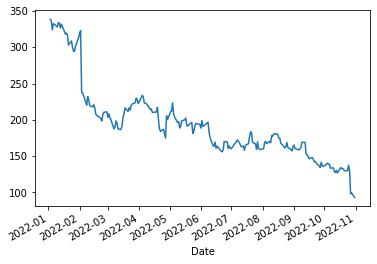

In [43]:
META_precios = META_his['Close']
META_precios.plot()
plt.show()

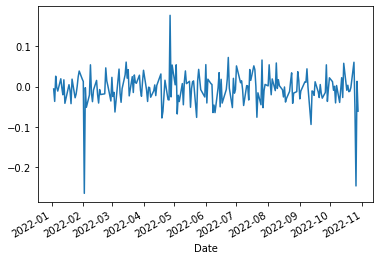

In [46]:
META_ip1 = META_precios.shift(-1)
METAr_i = (META_ip1-META_precios)/META_precios  
METAr_i.plot()
plt.show()

Statistics=0.878, p=0.000
Sample does not look Gaussian (reject H0)


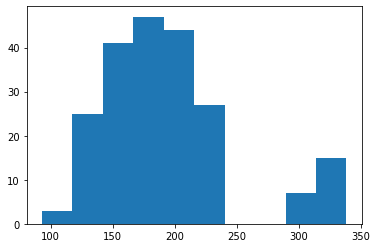

In [45]:
from numpy.random import randn
from matplotlib import pyplot
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
# generate univariate observations
data = META_precios
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
  print('Sample looks Gaussian (fail to reject H0)')
else:
  print('Sample does not look Gaussian (reject H0)')
pyplot.hist(data)
pyplot.show()

In [16]:
METAr_i.dropna(inplace=True)
barR = METAr_i.mean()
sdR = METAr_i.std()
print("Mean = ", barR)
print("S.d. = ", sdR)

Mean =  -0.002470865746766201
S.d. =  0.04033405384346403


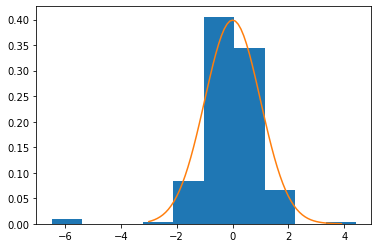

In [47]:
from scipy.stats import norm
x_axis = np.arange(-3, 4, 0.1)
META_norm = (METAr_i-barR)/sdR
plt.hist(META_norm, density=True)
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

In [48]:
mu = barR*METAr_i.size
print("mu=",mu)

mu= -0.516410941074136


In [49]:
from math import *
sigma = sdR*sqrt(METAr_i.size)
print("sigma=", sigma)

sigma= 0.5831026521844316


In [50]:
logMETA_precios = np.log(META_precios)
difMETA_precios = logMETA_precios - logMETA_precios.shift(1)
difMETA_precios.dropna(inplace=True)
sqrdifMETA_precios = difMETA_precios*difMETA_precios
sumlogdifs = sqrdifMETA_precios.sum()/(len(sqrdifMETA_precios)-1)
vol = sqrt(METAr_i.size)*sqrt(sumlogdifs)
print("vol=",vol)
## Just check it is not the standard deviation of log prices
vol2 = sqrt(METAr_i.size)*(logMETA_precios.std())
print("vol2=",vol2)

vol= 0.6409057345285842
vol2= 3.610990009644437


In [51]:
S0 = 194.42	
K	= 187.50	
T	= METAr_i.size/2/METAr_i.size
N	= 21
r	= -0.541119598541798
sigma =	0.6036683315446801
dt = T/N 
u	= np.exp(sigma*sqrt(dt))
d	= np.exp(-sigma*sqrt(dt))
p=(np.exp(r*dt)-d)/(u-d)

print(dt,u,d,p)
print("u= ",1+sigma*sqrt(dt), "\t d=", 1-sigma*sqrt(dt))

0.023809523809523808 1.0976242219217363 0.911058611889218 0.40811502716305886
u=  1.0931480458233709 	 d= 0.9068519541766291


In [60]:
V = {}

valores_intrisecos = []

#Si escenario == 1 entonces sube, Si escenario == 0 entonces baja 
def arbol(estados,st,u,d,k, longitud, escenario, sumaNodosAnteriores):
  st=round(st,2)
  if estados==0:

    valordelAnterior = 0
    if escenario == 1:
      valordelAnterior = st/u
    elif escenario == 0:
      valordelAnterior = st/d

    valordelAnterior = round(valordelAnterior,1)

    sumaDelNodo = st + valordelAnterior + sumaNodosAnteriores

    promedio = sumaDelNodo / (longitud+1)

    
    valores_intrisecos.append(max(0, round(promedio-k,2)))

    try:
        V[longitud].append(st)
    except:
        V[longitud]=[st]
  else:

    valordelAnterior = 0
    if escenario == 1:
      valordelAnterior = st/u

In [61]:
arbol(21,194.42,u,d,187.50	,0, -1, 0)

In [62]:
p = (np.exp(r*dt)-d)/(u-d)
dt = T/N
r = -0.002470865746766201

while len(valores_intrisecos) > 1:
    intrisecos_tmp = []
    for idx in range(0,len(valores_intrisecos),2):
        valor_presente = exp(-r*dt)*((p*valores_intrisecos[idx])  + (1-p)*valores_intrisecos[idx+1])
        intrisecos_tmp.append(valor_presente)

    valores_intrisecos = intrisecos_tmp

print(intrisecos_tmp)

[3.559900042115658]
